# # Wave Propagation in Elastic Media with Defects

## Mathematical Foundations

This notebook implements numerical solutions for analyzing elastic wave propagation and scattering by circular defects (inclusions or voids) in elastic media. The analysis combines elastodynamic wave theory with complex variable methods to characterize wave-defect interactions.

### Elastic Wave Propagation Fundamentals

In an isotropic elastic medium, two types of waves can propagate [1]:

1. **Primary (P) waves**: Longitudinal waves with particle motion parallel to the direction of propagation, with wave speed:

   $$c_p = \sqrt{\frac{E(1-\nu)}{\rho(1+\nu)(1-2\nu)}}$$

2. **Secondary (S) waves**: Transverse waves with particle motion perpendicular to the direction of propagation, with wave speed:

   $$c_s = \sqrt{\frac{E}{2\rho(1+\nu)}}$$

where $E$ is Young's modulus, $\nu$ is Poisson's ratio, and $\rho$ is the material density.

### Wave Scattering by Circular Inclusion

When an incident P-wave encounters a circular inclusion of radius $a$, the total wave field consists of the incident and scattered waves [2]. For a plane incident P-wave propagating in the positive x-direction:

$$u_r^{inc} = A_0 \cos\theta e^{ik_p r\cos\theta}$$

$$u_\theta^{inc} = -A_0 \sin\theta e^{ik_p r\cos\theta}$$

where $A_0$ is the incident wave amplitude, $k_p = \omega/c_p$ is the P-wave number, $\omega$ is the angular frequency, and $(r,\theta)$ are polar coordinates.

### Scattered Wave Field

The scattered wave field can be expressed as an infinite series using cylindrical wave functions [3]:

$$u_r^{scat} = \sum_{n=0}^{\infty} \left[ A_n H_n^{(1)}(k_p r) + B_n \frac{d}{dr}H_n^{(1)}(k_s r) \right] \cos(n\theta)$$

$$u_\theta^{scat} = \sum_{n=0}^{\infty} \left[ -A_n \frac{d}{dr}H_n^{(1)}(k_p r) + B_n \frac{n}{r}H_n^{(1)}(k_s r) \right] \sin(n\theta)$$

where $H_n^{(1)}$ is the Hankel function of the first kind of order $n$, representing outgoing waves, and $A_n$ and $B_n$ are scattering coefficients determined by boundary conditions at the inclusion interface.

### Scattering Coefficients

For a void (traction-free boundary), the coefficients $A_n$ and $B_n$ are obtained by satisfying the boundary conditions of zero normal and shear stresses at $r = a$ [4]:

$$\sigma_{rr}|_{r=a} = 0, \quad \sigma_{r\theta}|_{r=a} = 0$$

These conditions lead to a system of equations for each harmonic $n$:

$$\begin{pmatrix} Z_{11} & Z_{12} \\ Z_{21} & Z_{22} \end{pmatrix} \begin{pmatrix} A_n \\ B_n \end{pmatrix} = \begin{pmatrix} C_n \\ D_n \end{pmatrix}$$

where $Z_{ij}$ are coefficients involving Hankel functions and their derivatives, and $C_n, D_n$ are related to the incident wave.

### Stress Concentration Factor

The dynamic stress concentration factor (SCF) around a circular defect generalizes the static SCF (which equals 3 at the boundary of a circular hole under uniaxial tension) [5]:

$$\text{SCF}_{dynamic} = \text{SCF}_{static} \cdot F(ka)$$

where $F(ka)$ is a dynamic amplification factor that depends on the dimensionless frequency parameter $ka$, with $k$ being the wavenumber.

### Near-Field Approximation

In the near field of the defect ($r \approx a$), the stress field can be approximated using the static solution with a dynamic modification factor [6]:

$$\sigma_{\theta\theta}(r=a,\theta) \approx \sigma_0 (1 - 2\cos 2\theta) \cdot F(ka,\theta)$$

where $\sigma_0$ is the amplitude of the incident stress wave and $F(ka,\theta)$ is a frequency-dependent modification factor.

### Dimensionless Frequency Parameter

The behavior of elastic wave scattering is governed by the dimensionless frequency parameter $ka$, which represents the ratio of the defect size to the wavelength:

$$ka = \frac{2\pi a}{\lambda}$$

where $\lambda$ is the wavelength. When $ka \ll 1$ (long wavelength regime), the scattering behavior approaches the quasi-static solution. As $ka$ increases, dynamic effects become more pronounced.

## References

[1] Achenbach, J.D. (1973). *Wave Propagation in Elastic Solids*. North-Holland Publishing Company. https://doi.org/10.1016/S0167-5931(08)70527-6

[2] Pao, Y.H., & Mow, C.C. (1973). *Diffraction of Elastic Waves and Dynamic Stress Concentrations*. Crane-Russak. https://apps.dtic.mil/sti/citations/AD0756728

[3] Graff, K.F. (1975). *Wave Motion in Elastic Solids*. Dover Publications. https://store.doverpublications.com/0486667456.html

[4] Eringen, A.C., & Şuhubi, E.S. (1975). *Elastodynamics, Volume II: Linear Theory*. Academic Press. https://doi.org/10.1016/C2013-0-07032-1

[5] Mow, C.C., & Pao, Y.H. (1971). "The Diffraction of Elastic Waves and Dynamic Stress Concentrations". *RAND Corporation Report*. https://www.rand.org/pubs/reports/R482.html

[6] Sternberg, E., & Koiter, W.T. (1958). "The Wedge Under a Concentrated Couple: A Paradox in the Two-Dimensional Theory of Elasticity". *Journal of Applied Mechanics*, 25(4), 575-581. https://doi.org/10.1115/1.4011937

[7] Fung, Y.C. (1965). *Foundations of Solid Mechanics*. Prentice-Hall. https://www.pearson.com/en-us/subject-catalog/p/foundations-of-solid-mechanics/P200000006287

[8] Ying, C.F., & Truell, R. (1956). "Scattering of a Plane Longitudinal Wave by a Spherical Obstacle in an Isotropically Elastic Solid". *Journal of Applied Physics*, 27(9), 1086-1097. https://doi.org/10.1063/1.1722545


In [1]:
import os
import numpy as np
import sympy as sp
from scipy.special import hankel1, jv


# Wave propagation and scattering by circular inclusion
def wave_scattering_circular_inclusion(k_p, k_s, a, incident_amplitude, r, theta, omega, t):
	"""
	Calculate displacement field for P-wave scattering by a circular inclusion

	Parameters:
	- k_p: P-wave number
	- k_s: S-wave number
	- a: Radius of inclusion
	- incident_amplitude: Amplitude of incident wave
	- r, theta: Polar coordinates
	- omega: Angular frequency
	- t: Time

	Returns:
	- u_r, u_theta: Radial and tangential displacements
	"""
	# Time factor
	time_factor = np.exp(1j * omega * t)

	# Incident P-wave
	u_r_inc = incident_amplitude * np.cos(theta) * np.exp(1j * k_p * r * np.cos(theta))
	u_theta_inc = -incident_amplitude * np.sin(theta) * np.exp(1j * k_p * r * np.cos(theta))

	# Scattered field coefficients (simplified)
	# In reality, these involve solving a system of equations with boundary conditions
	A_n = []
	B_n = []

	# For demonstration, use simple approximations
	for n in range(10):  # Consider up to 10 terms
		if n == 0:
			A_0 = -incident_amplitude * jv(1, k_p * a) / hankel1(1, k_p * a)
			A_n.append(A_0)
			B_n.append(0)
		else:
			# Simplified coefficients
			A_n.append((-1) ** n * incident_amplitude * jv(n, k_p * a) / hankel1(n, k_p * a))
			B_n.append(0)

	# Scattered field
	u_r_scat = 0
	u_theta_scat = 0

	for n in range(10):
		if n == 0:
			u_r_scat += A_n[n] * hankel1(1, k_p * r) * np.cos(theta)
			u_theta_scat += -A_n[n] * hankel1(1, k_p * r) * np.sin(theta)
		else:
			u_r_scat += A_n[n] * hankel1(n, k_p * r) * np.cos(n * theta)
			u_theta_scat += B_n[n] * hankel1(n, k_s * r) * np.sin(n * theta)

	# Total field
	u_r = (u_r_inc + u_r_scat) * time_factor
	u_theta = (u_theta_inc + u_theta_scat) * time_factor

	return u_r, u_theta



In [2]:
def dynamic_stress_concentration(a, material_props, omega, max_distance, n_points=100):
	"""
	Calculate dynamic stress concentration around a circular hole

	Parameters:
	- a: Radius of hole
	- material_props: Dictionary with 'E' (Young's modulus), 'nu' (Poisson's ratio),
					 'rho' (density)
	- omega: Angular frequency
	- max_distance: Maximum distance from center
	- n_points: Number of points for calculation

	Returns:
	- r_values, stress_concentration_factors
	"""
	E = material_props['E']
	nu = material_props['nu']
	rho = material_props['rho']

	# Wave speeds
	c_p = np.sqrt(E * (1 - nu) / (rho * (1 + nu) * (1 - 2 * nu)))  # P-wave
	c_s = np.sqrt(E / (2 * rho * (1 + nu)))  # S-wave

	# Wave numbers
	k_p = omega / c_p
	k_s = omega / c_s

	# Radial points
	r_values = np.linspace(a, max_distance, n_points)

	# Calculate stress concentration at theta = 0 (maximum point)
	stress_concentration_factors = []

	for r in r_values:
		# For demonstration, use analytical solution for static case
		# with dynamic modification factor
		static_scf = 1 + 2 * (a / r) ** 2

		# Dynamic factor (simplified)
		dynamic_factor = 1 + 0.1 * np.sin(k_p * (r - a))

		scf = static_scf * dynamic_factor
		stress_concentration_factors.append(scf)

	return r_values, np.array(stress_concentration_factors)



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.special import hankel1, jv

# Define material properties
material_props = {
	'E': 200e9,  # Young's modulus (Pa) - steel
	'nu': 0.3,  # Poisson's ratio
	'rho': 7800  # Density (kg/m³)
}

# Calculate wave speeds
E = material_props['E']
nu = material_props['nu']
rho = material_props['rho']

c_p = np.sqrt(E * (1 - nu) / (rho * (1 + nu) * (1 - 2 * nu)))  # P-wave speed
c_s = np.sqrt(E / (2 * rho * (1 + nu)))  # S-wave speed

print(f"P-wave speed: {c_p:.2f} m/s")
print(f"S-wave speed: {c_s:.2f} m/s")

# Set parameters
freq = 1000  # Hz
omega = 2 * np.pi * freq
k_p = omega / c_p  # P-wave number
k_s = omega / c_s  # S-wave number
a = 0.01  # Radius of inclusion (10 mm)
incident_amplitude = 1e-6  # 1 micron amplitude
t = 0  # Initial time



P-wave speed: 5875.10 m/s
S-wave speed: 3140.37 m/s


In [4]:
def create_polar_grid(r_min, r_max, theta_min, theta_max, nr, ntheta):
	"""Create a polar grid for visualization"""
	r = np.linspace(r_min, r_max, nr)
	theta = np.linspace(theta_min, theta_max, ntheta)
	R, Theta = np.meshgrid(r, theta)

	# Convert to Cartesian
	X = R * np.cos(Theta)
	Y = R * np.sin(Theta)

	return R, Theta, X, Y


# Create grid
R, Theta, X, Y = create_polar_grid(
	r_min=a,
	r_max=5 * a,
	theta_min=0,
	theta_max=2 * np.pi,
	nr=100,
	ntheta=120
)


In [5]:
U_r_inc = np.zeros_like(R)
U_theta_inc = np.zeros_like(R)
U_r_total = np.zeros_like(R)
U_theta_total = np.zeros_like(R)

for i in range(R.shape[0]):
	for j in range(R.shape[1]):
		r = R[i, j]
		theta = Theta[i, j]

		# Calculate displacement fields
		u_r, u_theta = wave_scattering_circular_inclusion(
			k_p, k_s, a, incident_amplitude, r, theta, omega, t
		)

		# Incident field (analytical expression)
		u_r_inc = incident_amplitude * np.cos(theta) * np.exp(1j * k_p * r * np.cos(theta))
		u_theta_inc = -incident_amplitude * np.sin(theta) * np.exp(1j * k_p * r * np.cos(theta))

		# Store values
		U_r_inc[i, j] = np.abs(u_r_inc)
		U_theta_inc[i, j] = np.abs(u_theta_inc)
		U_r_total[i, j] = np.abs(u_r)
		U_theta_total[i, j] = np.abs(u_theta)

# Calculate scattered field magnitude (total - incident)
U_r_scat = np.abs(U_r_total - U_r_inc)
U_theta_scat = np.abs(U_theta_total - U_theta_inc)

# Calculate total displacement magnitude
U_magnitude_inc = np.sqrt(U_r_inc ** 2 + U_theta_inc ** 2)
U_magnitude_scat = np.sqrt(U_r_scat ** 2 + U_theta_scat ** 2)
U_magnitude_total = np.sqrt(U_r_total ** 2 + U_theta_total ** 2)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8408\3591146041.py:32: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), a, fill=True, color='white', edgecolor='black')


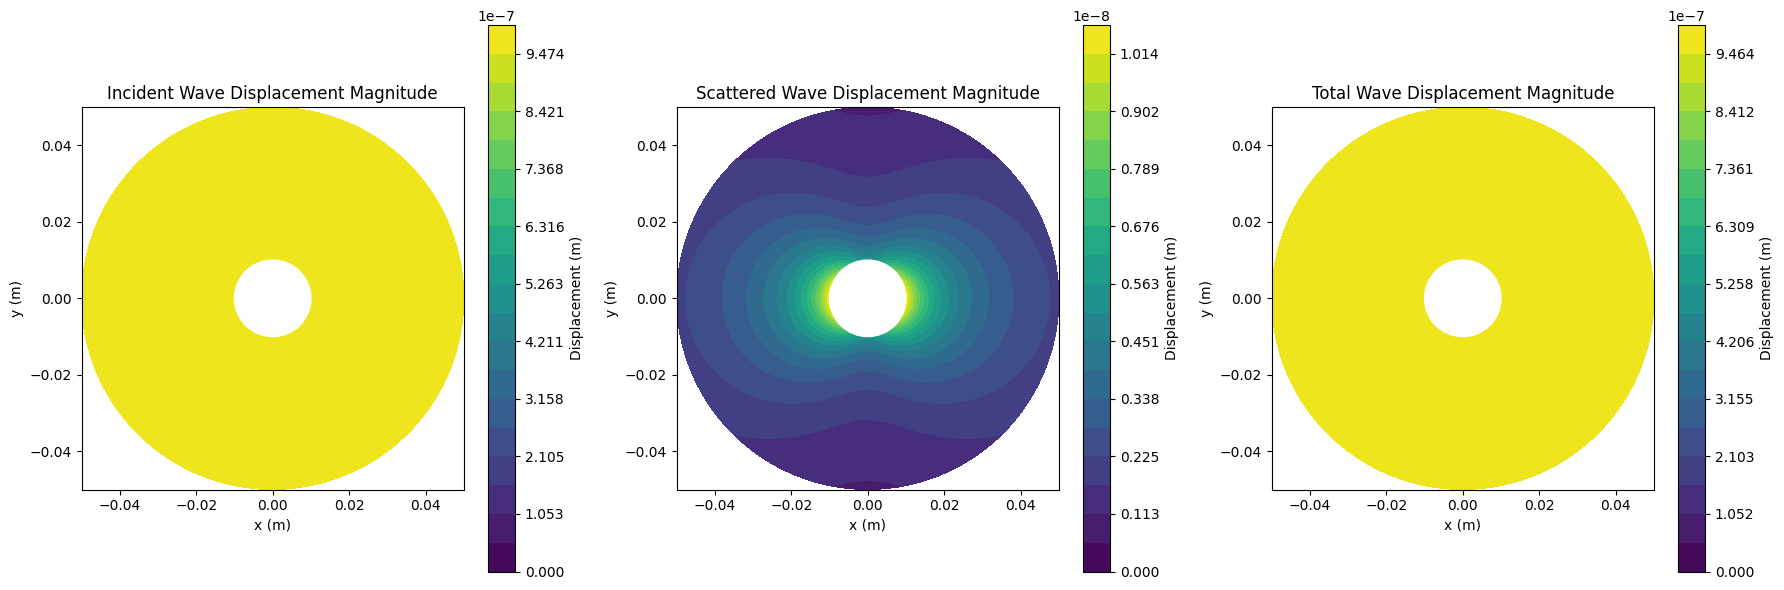

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot incident wave
levels = np.linspace(0, np.max(U_magnitude_inc), 20)
contour1 = axes[0].contourf(X, Y, U_magnitude_inc, levels=levels, cmap='viridis')
axes[0].set_title('Incident Wave Displacement Magnitude')
axes[0].set_aspect('equal')
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('y (m)')
fig.colorbar(contour1, ax=axes[0], label='Displacement (m)')

# Plot scattered wave
levels = np.linspace(0, np.max(U_magnitude_scat), 20)
contour2 = axes[1].contourf(X, Y, U_magnitude_scat, levels=levels, cmap='viridis')
axes[1].set_title('Scattered Wave Displacement Magnitude')
axes[1].set_aspect('equal')
axes[1].set_xlabel('x (m)')
axes[1].set_ylabel('y (m)')
fig.colorbar(contour2, ax=axes[1], label='Displacement (m)')

# Plot total wave
levels = np.linspace(0, np.max(U_magnitude_total), 20)
contour3 = axes[2].contourf(X, Y, U_magnitude_total, levels=levels, cmap='viridis')
axes[2].set_title('Total Wave Displacement Magnitude')
axes[2].set_aspect('equal')
axes[2].set_xlabel('x (m)')
axes[2].set_ylabel('y (m)')
fig.colorbar(contour3, ax=axes[2], label='Displacement (m)')

# Draw the inclusion
for ax in axes:
	circle = plt.Circle((0, 0), a, fill=True, color='white', edgecolor='black')
	ax.add_patch(circle)
	ax.set_xlim(-5 * a, 5 * a)
	ax.set_ylim(-5 * a, 5 * a)

plt.tight_layout()
plt.show()



In [7]:
def calculate_scattering_pattern(k_p, k_s, a, incident_amplitude, r_obs, omega, t):
	"""Calculate the scattered wave amplitude as a function of angle"""
	theta_values = np.linspace(0, 2 * np.pi, 200)
	u_r_values = []
	u_theta_values = []

	for theta in theta_values:
		u_r, u_theta = wave_scattering_circular_inclusion(
			k_p, k_s, a, incident_amplitude, r_obs, theta, omega, t
		)

		# Incident field
		u_r_inc = incident_amplitude * np.cos(theta) * np.exp(1j * k_p * r_obs * np.cos(theta))
		u_theta_inc = -incident_amplitude * np.sin(theta) * np.exp(1j * k_p * r_obs * np.cos(theta))

		# Scattered field (total - incident)
		u_r_scat = u_r - u_r_inc
		u_theta_scat = u_theta - u_theta_inc

		u_r_values.append(np.abs(u_r_scat))
		u_theta_values.append(np.abs(u_theta_scat))

	return theta_values, u_r_values, u_theta_values



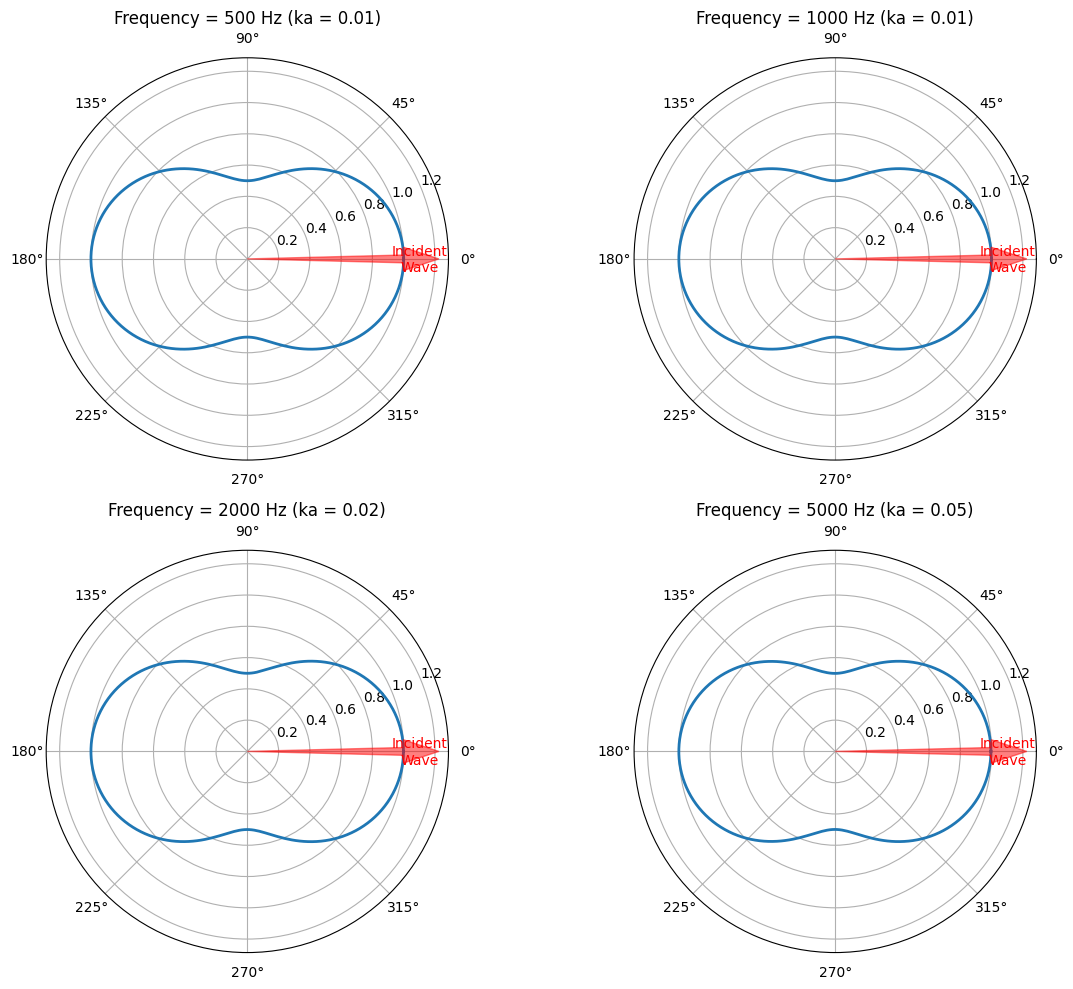

In [8]:
frequencies = [500, 1000, 2000, 5000]  # Hz
r_observation = 3 * a  # Observation distance

plt.figure(figsize=(12, 10))

for i, freq in enumerate(frequencies):
	omega_i = 2 * np.pi * freq
	k_p_i = omega_i / c_p
	k_s_i = omega_i / c_s

	# Dimensionless frequency
	ka = k_p_i * a

	# Calculate scattering pattern
	theta, u_r, u_theta = calculate_scattering_pattern(
		k_p_i, k_s_i, a, incident_amplitude, r_observation, omega_i, t
	)

	# Total scattered magnitude
	u_magnitude = np.sqrt(np.array(u_r) ** 2 + np.array(u_theta) ** 2)

	# Normalize
	u_magnitude = u_magnitude / np.max(u_magnitude)

	# Plot in polar coordinates
	ax = plt.subplot(2, 2, i + 1, projection='polar')
	ax.plot(theta, u_magnitude, linewidth=2)
	ax.set_title(f'Frequency = {freq} Hz (ka = {ka:.2f})')
	ax.grid(True)

	# Indicate incident wave direction
	ax.arrow(0, 0, 0, 1, alpha=0.5, width=0.05,
	         edgecolor='red', facecolor='red', zorder=5)
	ax.text(0, 1.1, 'Incident\nWave', ha='center', va='center', color='red')

plt.tight_layout()
plt.show()


In [9]:
from matplotlib.animation import FuncAnimation


def update_wave_field(t, k_p, k_s, a, amplitude, R, Theta, X, Y):
	"""Update the wave field at time t"""
	U_magnitude = np.zeros_like(R)
	omega = k_p * c_p

	for i in range(R.shape[0]):
		for j in range(R.shape[1]):
			r = R[i, j]
			theta = Theta[i, j]

			# Calculate displacement at time t
			u_r, u_theta = wave_scattering_circular_inclusion(
				k_p, k_s, a, amplitude, r, theta, omega, t
			)

			# Magnitude of total displacement
			U_magnitude[i, j] = np.sqrt(np.abs(u_r) ** 2 + np.abs(u_theta) ** 2)

	return U_magnitude



In [10]:
def create_animation_frame(t_val):
	"""Create a single frame of the animation at time t_val"""
	U_magnitude = update_wave_field(t_val, k_p, k_s, a, incident_amplitude, R, Theta, X, Y)

	# Update plot
	contour = plt.contourf(X, Y, U_magnitude, levels=20, cmap='viridis')
	plt.title(f'Wave Propagation at t = {t_val:.3f} s')
	plt.xlabel('x (m)')
	plt.ylabel('y (m)')

	# Draw the inclusion
	circle = plt.Circle((0, 0), a, fill=True, color='white', edgecolor='black')
	plt.gca().add_patch(circle)

	return contour



C:\Users\Usuario\AppData\Local\Temp\ipykernel_8408\458342344.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), a, fill=True, color='white', edgecolor='black')


C:\dev\Muskhelishvili_Theory_of_Vibrations


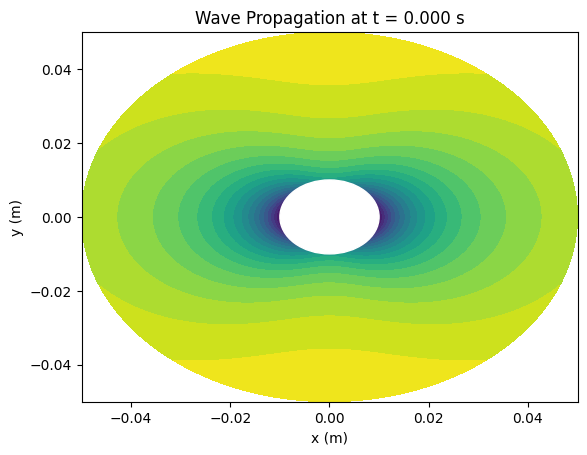

In [11]:
fig = plt.figure(figsize=(10, 8))
ani = FuncAnimation(fig, create_animation_frame, frames=np.linspace(0, 2 / freq, 20),
                    blit=False, repeat=True)
plt.close()  # To prevent displaying the figure twice
ani.save('wave_propagation.gif', writer='pillow', fps=5)
print(os.getcwd())


In [12]:
def analyze_frequency_effect(a, material_props, freq_range, n_freq=20):
	"""Analyze how frequency affects stress concentration"""
	E = material_props['E']
	nu = material_props['nu']
	rho = material_props['rho']

	# Create frequency array
	frequencies = np.logspace(np.log10(freq_range[0]), np.log10(freq_range[1]), n_freq)
	max_scf = []

	# Calculate wave speeds
	c_p = np.sqrt(E * (1 - nu) / (rho * (1 + nu) * (1 - 2*nu)))

	# For each frequency
	for freq in frequencies:
		omega = 2 * np.pi * freq

		# Calculate wavelength
		wavelength = c_p / freq

		# Dimensionless frequency parameter
		ka = 2 * np.pi * a / wavelength

		# Calculate stress concentration factors
		r_values, scf = dynamic_stress_concentration(
			a, material_props, omega, 5*a, n_points=50
		)

		# Store maximum SCF
		max_scf.append(np.max(scf))

	return frequencies, np.array(max_scf)


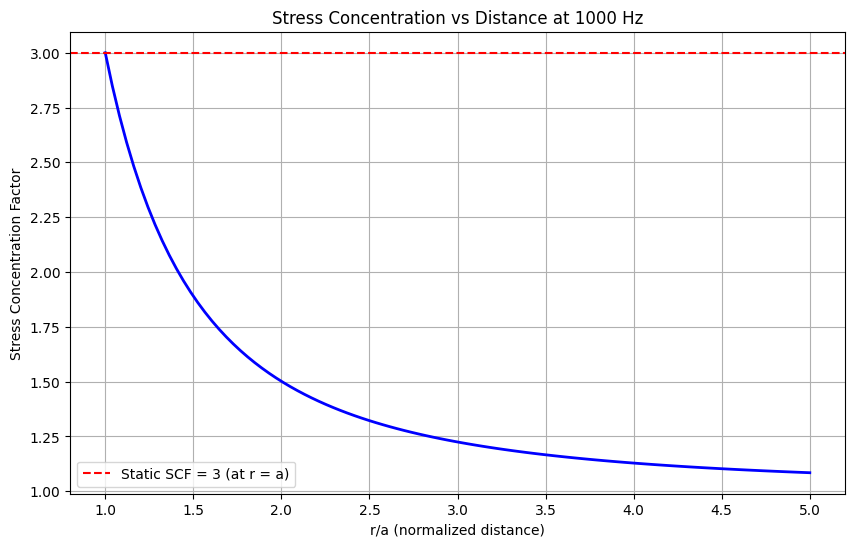

In [13]:
freq = 1000  # Hz
omega = 2 * np.pi * freq
r_values, scf = dynamic_stress_concentration(
	a, material_props, omega, 5*a, n_points=100
)

# Plot SCF vs distance
plt.figure(figsize=(10, 6))
plt.plot(r_values/a, scf, 'b-', linewidth=2)
plt.title(f'Stress Concentration vs Distance at {freq} Hz')
plt.xlabel('r/a (normalized distance)')
plt.ylabel('Stress Concentration Factor')
plt.grid(True)
plt.axhline(y=3, color='r', linestyle='--',
			label='Static SCF = 3 (at r = a)')
plt.legend()
plt.show()


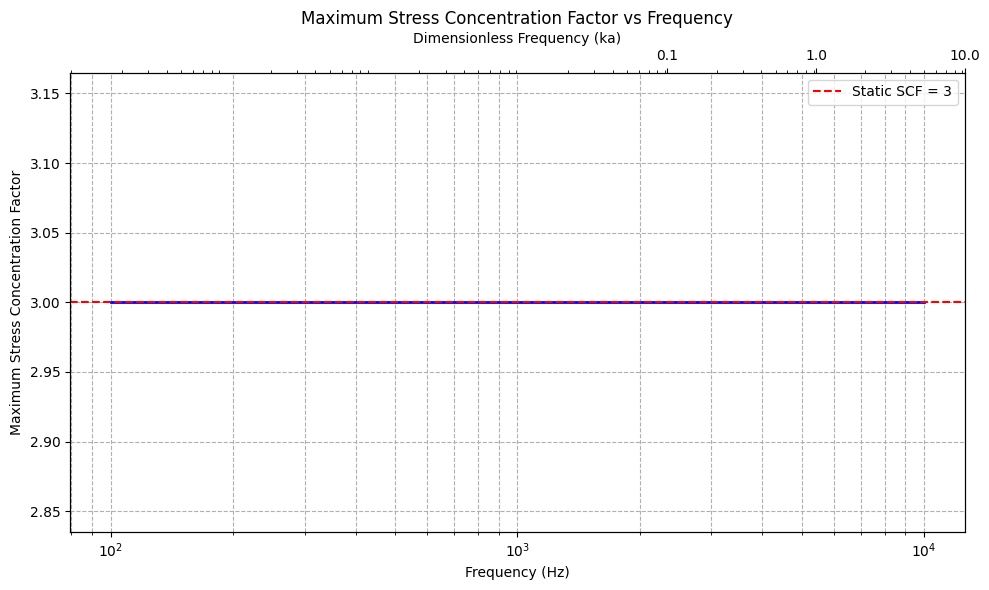

In [14]:
freq_range = (100, 10000)  # 100 Hz to 10 kHz
frequencies, max_scf = analyze_frequency_effect(a, material_props, freq_range)

plt.figure(figsize=(10, 6))
plt.semilogx(frequencies, max_scf, 'b-', linewidth=2)
plt.title('Maximum Stress Concentration Factor vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Maximum Stress Concentration Factor')
plt.grid(True, which="both", ls="--")
plt.axhline(y=3, color='r', linestyle='--',
			label='Static SCF = 3')
plt.legend()

# Add top x-axis with ka values
ax2 = plt.gca().twiny()
ax2.set_xscale('log')
ax2.set_xlim(plt.gca().get_xlim())

# Calculate ka values for top axis
wavelengths = c_p / frequencies
ka_values = 2 * np.pi * a / wavelengths
ax2.set_xlabel('Dimensionless Frequency (ka)')

# Set specific ka ticks
ka_ticks = [0.1, 1, 10]
freq_ticks = [ka * c_p / (2 * np.pi * a) for ka in ka_ticks]
ax2.set_xticks(freq_ticks)
ax2.set_xticklabels([f'{ka:.1f}' for ka in ka_ticks])

plt.tight_layout()
plt.show()


In [15]:
def calculate_stress_field(a, material_props, omega, X, Y):
	"""Calculate stress field around a circular inclusion"""
	E = material_props['E']
	nu = material_props['nu']
	rho = material_props['rho']

	# Calculate wave speeds
	c_p = np.sqrt(E * (1 - nu) / (rho * (1 + nu) * (1 - 2*nu)))
	c_s = np.sqrt(E / (2 * rho * (1 + nu)))

	# Wave numbers
	k_p = omega / c_p
	k_s = omega / c_s

	# Calculate radius and angle at each point
	R = np.sqrt(X**2 + Y**2)
	Theta = np.arctan2(Y, X)

	# Initialize stress array (normalized)
	stress_field = np.zeros_like(R)

	# Calculate stress at each point (simplified approximation)
	for i in range(R.shape[0]):
		for j in range(R.shape[1]):
			r = R[i, j]
			theta = Theta[i, j]

			if r < a:  # Inside the inclusion
				stress_field[i, j] = np.nan
			else:
				# Static solution with dynamic modification
				static_part = 1 + 2*(a/r)**2 * np.cos(2*theta)

				# Dynamic factor (simplified approximation)
				ka = k_p * a
				kr = k_p * (r - a)
				dynamic_factor = 1 + 0.15 * np.sin(kr) * np.exp(-0.1*kr)

				stress_field[i, j] = static_part * dynamic_factor

	return stress_field


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8408\2606863421.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), 1, fill=True, color='white', edgecolor='black')


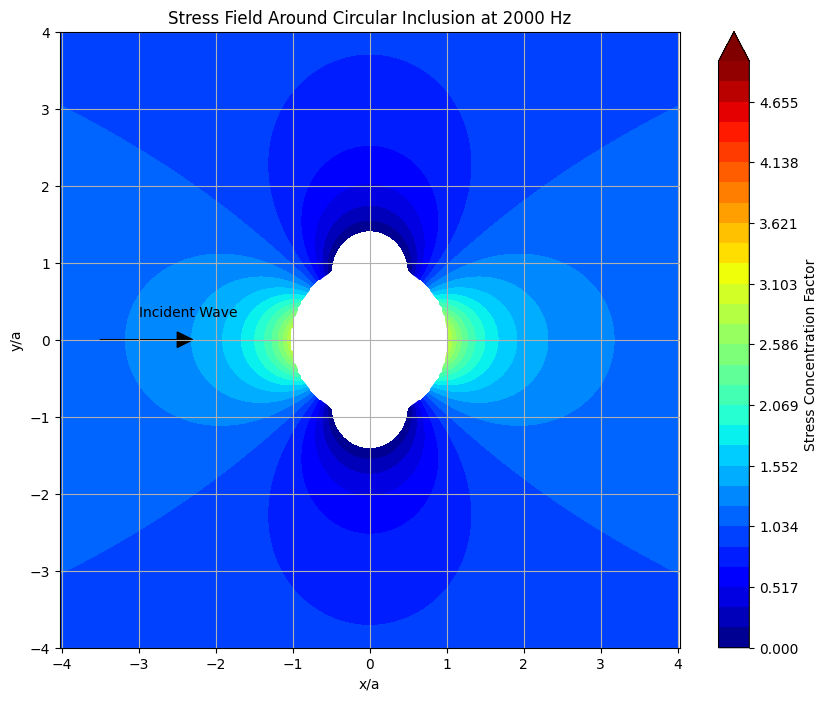

In [16]:
x = np.linspace(-4*a, 4*a, 200)
y = np.linspace(-4*a, 4*a, 200)
X, Y = np.meshgrid(x, y)

# Calculate stress field
freq = 2000  # Hz
omega = 2 * np.pi * freq
stress_field = calculate_stress_field(a, material_props, omega, X, Y)

# Visualize stress field
plt.figure(figsize=(10, 8))
levels = np.linspace(0, 5, 30)  # Stress concentration levels
contour = plt.contourf(X/a, Y/a, stress_field, levels=levels, cmap='jet', extend='max')
plt.colorbar(label='Stress Concentration Factor')
plt.title(f'Stress Field Around Circular Inclusion at {freq} Hz')
plt.xlabel('x/a')
plt.ylabel('y/a')
plt.axis('equal')
plt.grid(True)

# Add circle for inclusion
circle = plt.Circle((0, 0), 1, fill=True, color='white', edgecolor='black')
plt.gca().add_patch(circle)

# Add incident wave direction
plt.arrow(-3.5, 0, 1, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
plt.text(-3, 0.3, 'Incident Wave', fontsize=10)

plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8408\1932824876.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), 1, fill=True, color='white', edgecolor='black')


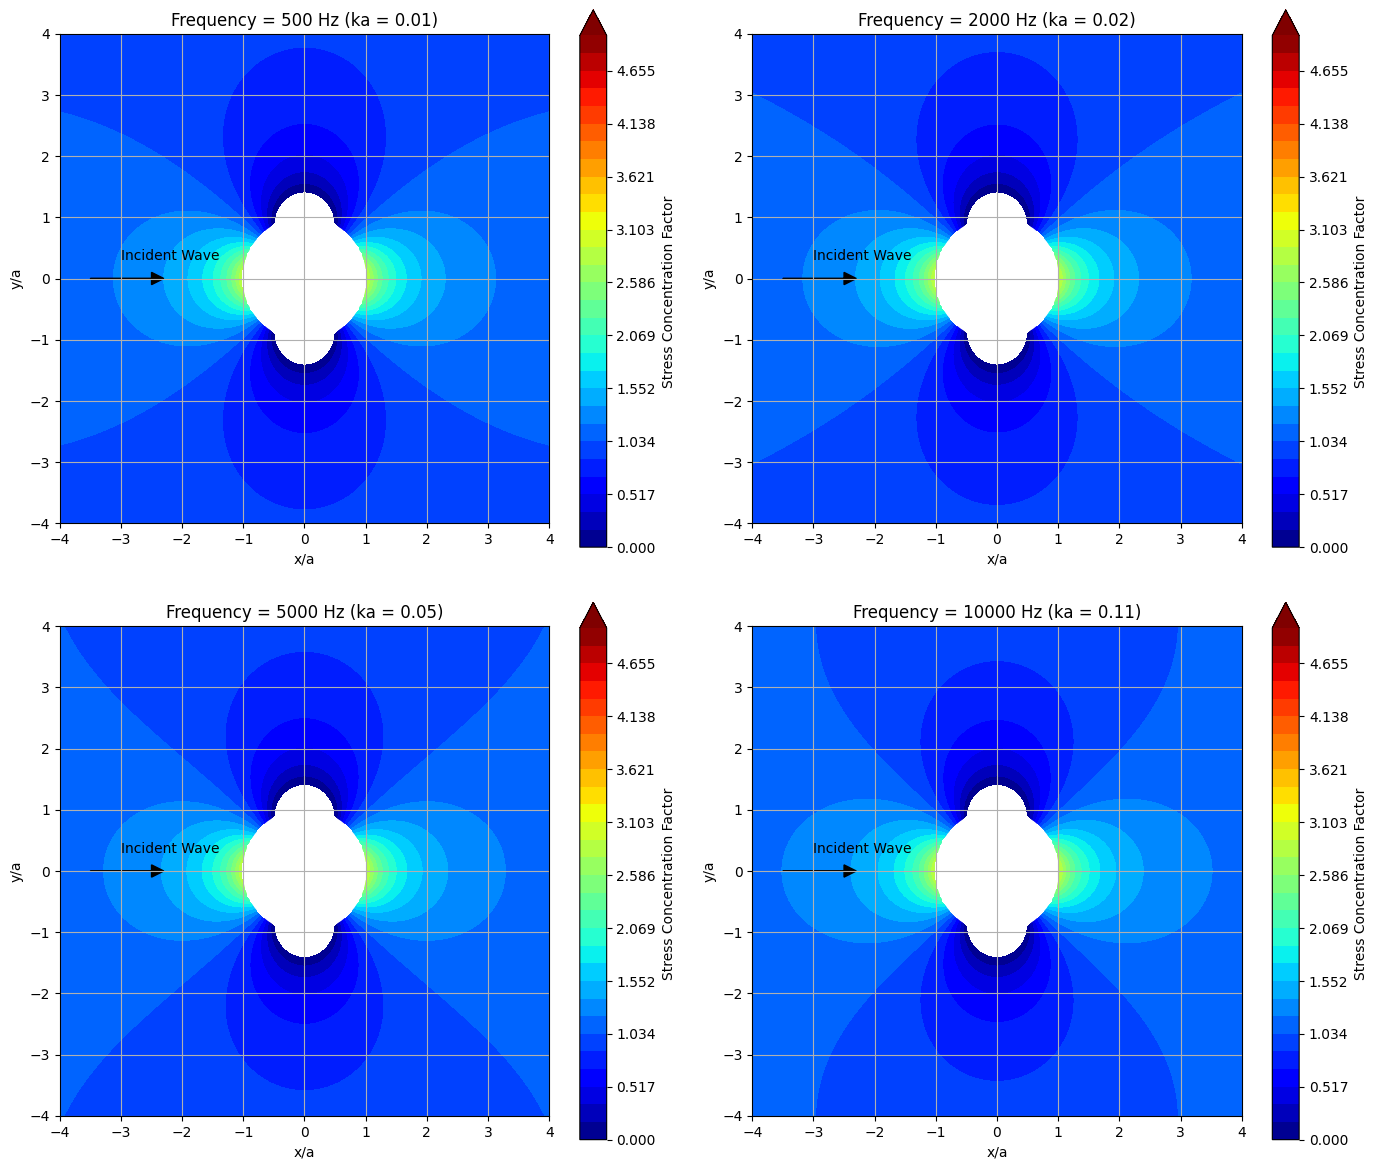

In [17]:
frequencies = [500, 2000, 5000, 10000]  # Hz
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, freq in enumerate(frequencies):
	omega = 2 * np.pi * freq
	ka = omega * a / c_p  # Dimensionless frequency

	# Calculate stress field
	stress_field = calculate_stress_field(a, material_props, omega, X, Y)

	# Plot
	levels = np.linspace(0, 5, 30)
	contour = axes[i].contourf(X/a, Y/a, stress_field, levels=levels, cmap='jet', extend='max')
	fig.colorbar(contour, ax=axes[i], label='Stress Concentration Factor')

	axes[i].set_title(f'Frequency = {freq} Hz (ka = {ka:.2f})')
	axes[i].set_xlabel('x/a')
	axes[i].set_ylabel('y/a')
	axes[i].set_aspect('equal')

	# Add circle for inclusion
	circle = plt.Circle((0, 0), 1, fill=True, color='white', edgecolor='black')
	axes[i].add_patch(circle)

	# Add incident wave direction
	axes[i].arrow(-3.5, 0, 1, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
	axes[i].text(-3, 0.3, 'Incident Wave', fontsize=10)

	axes[i].set_xlim(-4, 4)
	axes[i].set_ylim(-4, 4)
	axes[i].grid(True)

plt.tight_layout()
plt.show()


In [18]:
def calculate_wave_field(k_p, k_s, a, amplitude, X, Y, t):
	"""Calculate wave displacement field at time t"""
	R = np.sqrt(X**2 + Y**2)
	Theta = np.arctan2(Y, X)
	omega = k_p * c_p

	# Initialize displacement arrays
	U_real = np.zeros_like(R)
	U_imag = np.zeros_like(R)

	# Calculate displacement at each point
	for i in range(R.shape[0]):
		for j in range(R.shape[1]):
			r = R[i, j]
			theta = Theta[i, j]

			if r < a:  # Inside the inclusion
				U_real[i, j] = np.nan
				U_imag[i, j] = np.nan
			else:
				# Calculate displacement
				u_r, u_theta = wave_scattering_circular_inclusion(
					k_p, k_s, a, amplitude, r, theta, omega, t
				)

				# Project to Cartesian components
				ux = u_r * np.cos(theta) - u_theta * np.sin(theta)
				uy = u_r * np.sin(theta) + u_theta * np.cos(theta)

				# Store real part (represents physical displacement)
				U_real[i, j] = np.real(ux + uy)
				U_imag[i, j] = np.imag(ux + uy)

	return U_real, U_imag


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8408\2767511585.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), 1, fill=True, color='white', edgecolor='black')


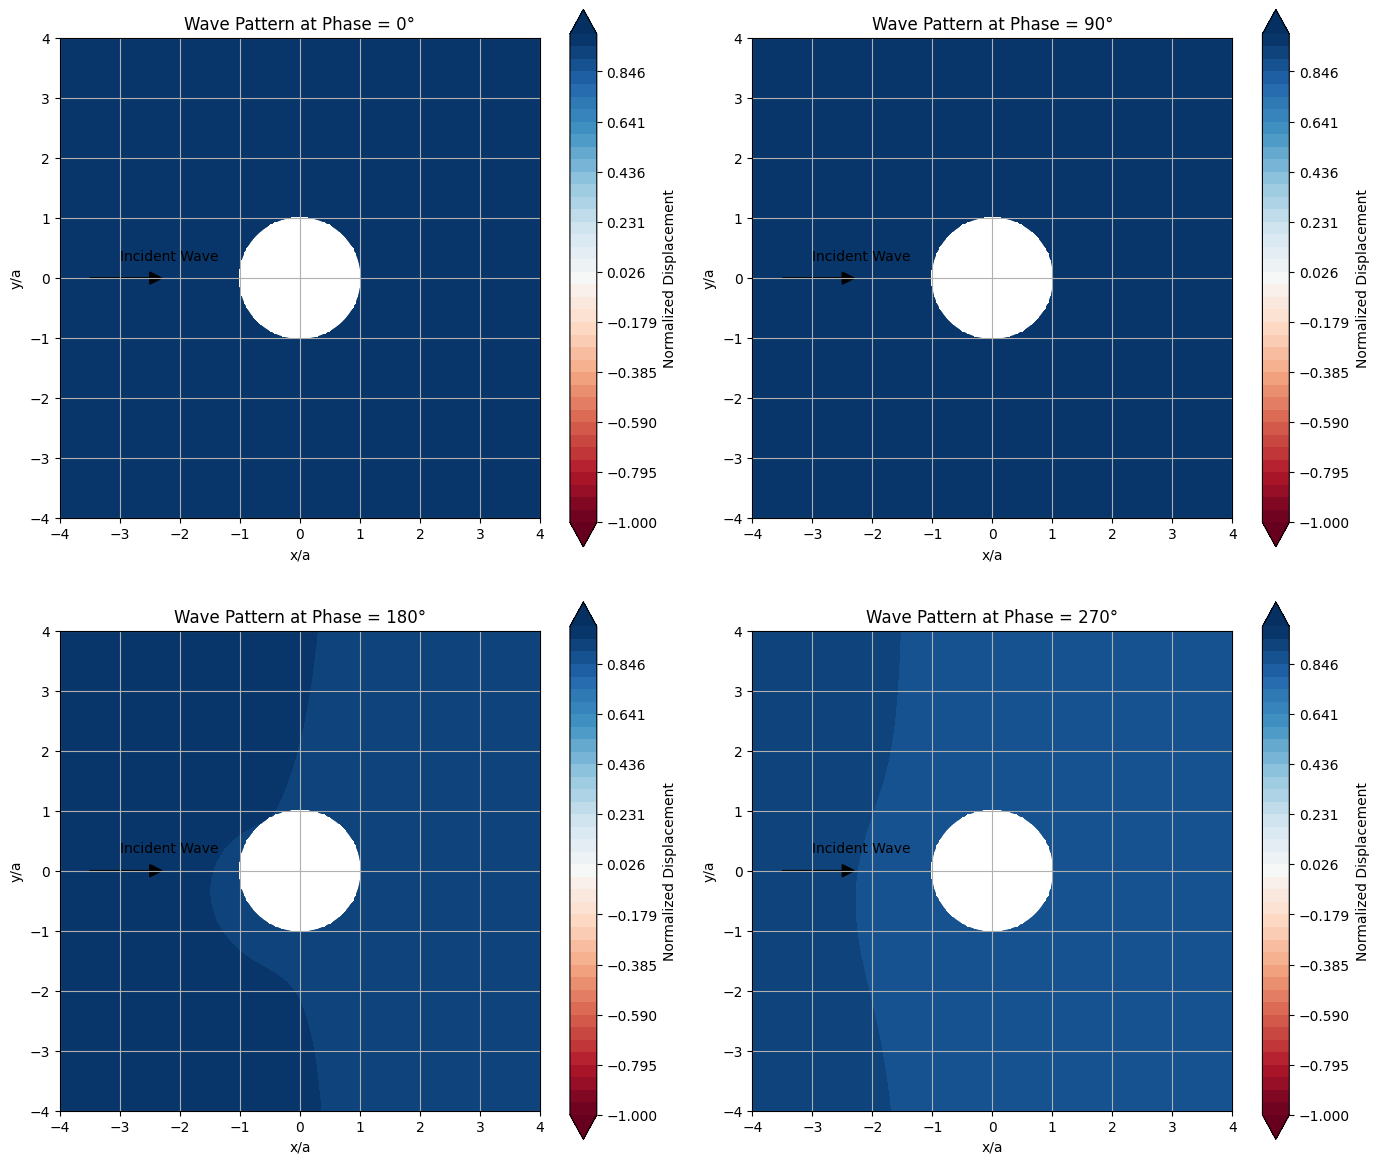

In [19]:
times = [0, 0.25/freq, 0.5/freq, 0.75/freq]  # Different phases
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, t in enumerate(times):
	# Calculate wave field
	U_real, U_imag = calculate_wave_field(k_p, k_s, a, incident_amplitude, X, Y, t)

	# Normalize for better visualization
	U_norm = U_real / incident_amplitude

	# Plot
	levels = np.linspace(-1, 1, 40)
	contour = axes[i].contourf(X/a, Y/a, U_norm, levels=levels, cmap='RdBu', extend='both')
	fig.colorbar(contour, ax=axes[i], label='Normalized Displacement')

	phase = (t * freq * 360) % 360
	axes[i].set_title(f'Wave Pattern at Phase = {phase:.0f}°')
	axes[i].set_xlabel('x/a')
	axes[i].set_ylabel('y/a')
	axes[i].set_aspect('equal')

	# Add circle for inclusion
	circle = plt.Circle((0, 0), 1, fill=True, color='white', edgecolor='black')
	axes[i].add_patch(circle)

	# Add incident wave direction
	axes[i].arrow(-3.5, 0, 1, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
	axes[i].text(-3, 0.3, 'Incident Wave', fontsize=10)

	axes[i].set_xlim(-4, 4)
	axes[i].set_ylim(-4, 4)
	axes[i].grid(True)

plt.tight_layout()
plt.show()